### Exploration

-Explore interaction of all attributes and target variable to help discover drivers of our target variable.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import env
import wrangle
import split_scale
import util

In [5]:
df = wrangle.wrangle_telco()
util.tell_me_about(df)

DataFrame Shape:

(1685, 3)

Info about:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 3 columns):
monthly_charges    1685 non-null float64
total_charges      1685 non-null float64
tenure             1685 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.7 KB
None

Describe:

       monthly_charges  total_charges      tenure
count      1685.000000    1685.000000  1685.00000
mean         60.872374    3728.933947    57.07181
std          34.712210    2571.252806    17.72913
min          18.400000      20.350000     1.00000
25%          24.050000    1278.800000    48.00000
50%          64.450000    3623.950000    64.00000
75%          90.550000    5999.850000    71.00000
max         118.750000    8672.450000    72.00000

Preview:

   monthly_charges  total_charges  tenure
0           109.70        7904.25      71
1            84.65        5377.80      63
2            90.45        5957.90      65
3            45.20        2460.55 

In [6]:
train, test = split_scale.split_my_data(df)

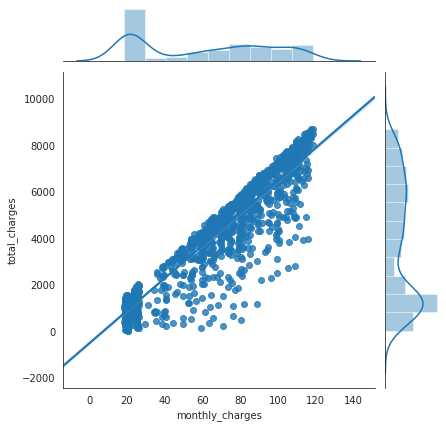

In [10]:
with sns.axes_style("white"):
    j = sns.jointplot("monthly_charges", "total_charges", data=df, kind="reg")


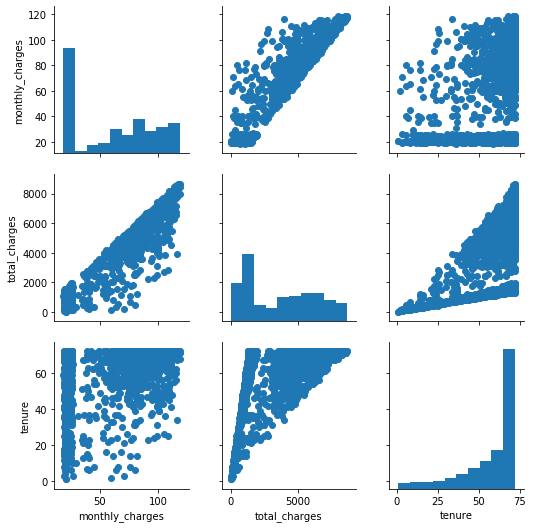

In [11]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

(0, 3)

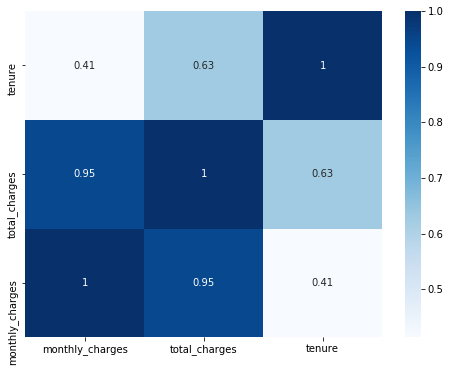

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap="Blues", annot=True)
plt.ylim(0,3)

#### Exercises

-Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Create a file, explore.py, that contains the following functions for exploring your variables (features & target).



1. Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.



In [14]:
def plot_variable_pairs(df):
    g=sns.PairGrid(df)
    g.map(sns.regplot)
    plt.show()

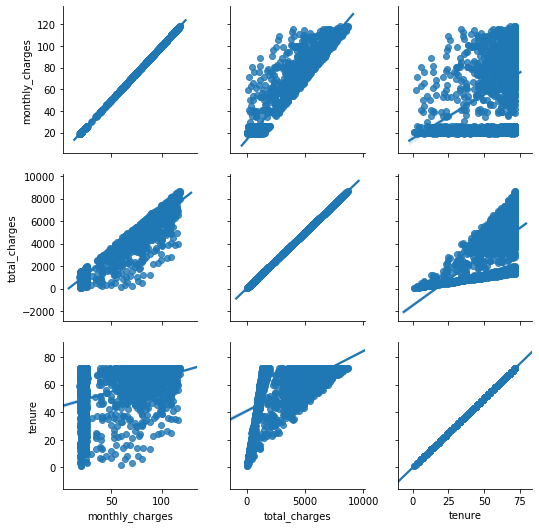

In [15]:
plot_variable_pairs(df)

2. Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.



In [16]:
def months_to_years(df):
    df["tenure_years"] = round(df.tenure // 12).astype("category")
    return df

In [18]:
months_to_years(df).head()

,monthly_charges,total_charges,tenure,tenure_years
0,109.70,7904.25,71,5
1,84.65,5377.80,63,5
2,90.45,5957.90,65,5
3,45.20,2460.55,54,4
4,116.80,8456.75,72,6


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
monthly_charges    1685 non-null float64
total_charges      1685 non-null float64
tenure             1685 non-null int64
tenure_years       1685 non-null category
dtypes: category(1), float64(2), int64(1)
memory usage: 54.7 KB


3. Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [27]:
def plot_categorical_and_continuous_vars(df):
    plt.figure(figsize=(16,8))
    plt.subplot(1, 3, 1)
    plt.bar(df.tenure_years, df.total_charges)
    plt.xlabel("Tenure in years")
    plt.ylabel("Total charges in dollars")
    plt.subplot(1, 3, 2)
    sns.stripplot(df.tenure_years, df.total_charges)
    plt.subplot(1, 3, 3)
    plt.pie(df.groupby("tenure_years")["total_charges"].sum(), labels=list(df.tenure_years.unique()), autopct="%1.1f%%", shadow=True)
    plt.title("Percent of total charges by tenure")
    plt.show()

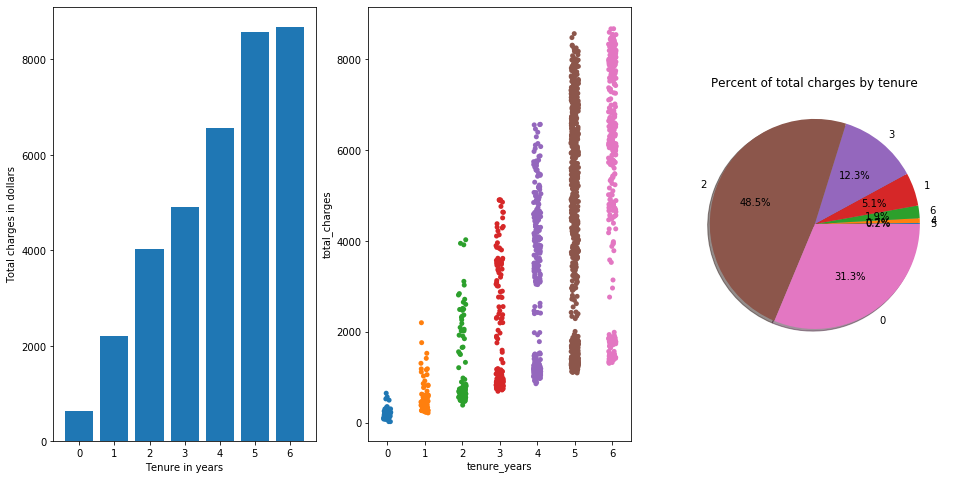

In [28]:
plot_categorical_and_continuous_vars(df)